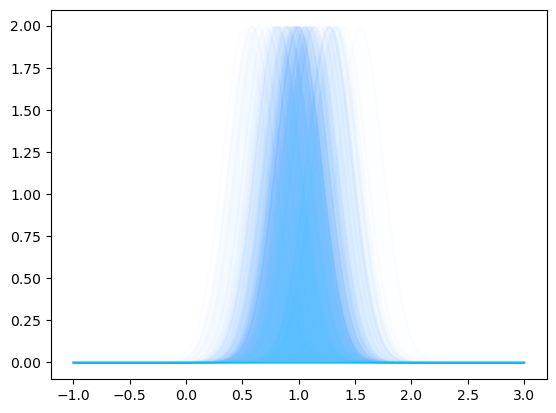

In [227]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import math
import matplotlib.image as mpimg

def likelihood_gauss (mu_t, sigma_t, mu_range, n_data):
    dist_gauss = norm.rvs(mu_t, sigma_t, size = n_data)
    L_Gauss = []
    for mu in mu_range:
        L_G_temp = norm.logpdf(dist_gauss,mu)
        L_G_sum = np.sum(L_G_temp)
        L_Gauss = np.append(L_Gauss, L_G_sum)
    return L_Gauss

fig1, ax1 = plt.subplots()
n_data = 100
mu_t = 1
sigma_t = 0.2
mu_range = np.linspace(mu_t-2, mu_t+2, 1000)
x_data = norm.rvs(mu_t, sigma_t, size = n_data)
logL_Gauss = np.full(1000,0.)
#lyne_color =['blue', 'red', 'green', 'orange', 'purple']
for x in x_data:
    like_temp = []
    for mu in mu_range:
        dist_gauss = norm.pdf(x, mu, sigma_t)
        like_temp = np.append(like_temp, dist_gauss)
    ax1.plot(mu_range, like_temp, linewidth = 1.5, color = 'deepskyblue', alpha = 0.006)
    ax1.fill_between(mu_range, like_temp, color="deepskyblue", alpha=0.006)    
    logL_Gauss += np.log(like_temp, out = like_temp)
plt.show()


1.006006006006006
1.0065743978387978


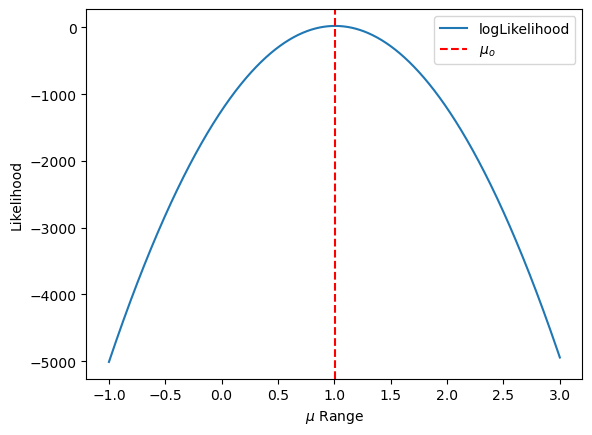

In [228]:
fig2, ax2 = plt.subplots()
index = np.where(logL_Gauss == logL_Gauss.max())
index = index[0][0]
mean_l = mu_range[index]
print(mean_l)
mean_o =sum(x_data/n_data)
print(mean_o)

plt.plot(mu_range, logL_Gauss, linewidth = 1.5, label = "logLikelihood")
plt.axvline(x=sum(x_data)/n_data, color="red", linestyle="--", label=r"$\mu_o$")
plt.xlabel(r"$\mu$ Range")
plt.ylabel("Likelihood")
plt.legend(loc = "upper right")

0.1997999999999881


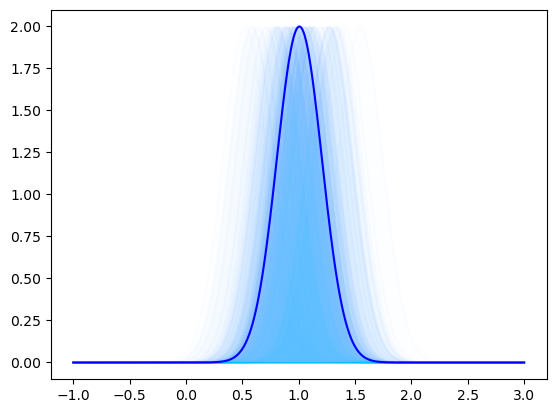

In [229]:
delta_mu = 4/100
deriv_1 = np.diff(logL_Gauss)
deriv_2 = np.diff(deriv_1)/(delta_mu*delta_mu)
sigma_l = 1/math.sqrt(-deriv_2[index])
print(sigma_l)
x_set = np.linspace(-1, 3, 1000)
ax1.plot(x_set, norm.pdf(x_set, mean_l, sigma_l), color = 'b')
display(fig1)